In [23]:
import pandas as pd
import matplotlib.pyplot as plt



In [24]:
#read data into dataframe
data_population = pd.read_excel('Resources/data.xlsx')
#data_temperature = pd.read_excel('Resources/Salmon_Mean_temp_data.xlsx')


In [25]:
# Read all sheets from the Excel file into a dictionary of DataFrames
data_temperature = pd.read_excel('Resources/Salmon_Mean_temp_data.xlsx', sheet_name=None)

# Display the keys (sheet names) to confirm what has been loaded
print(data_temperature.keys())


dict_keys(['willmette Portland', 'Deschutes Wilmette', 'Wilmette Eugene', 'Interior columbia Dalles', 'interior columbia Ahsahka', 'interior columbia Dam', 'Oregon coast 1', 'Oregon coast 2'])


In [26]:
# Combine all sheets into one DataFrame
data_temperature = pd.concat(data_temperature.values(), ignore_index=True)

# Display the first few rows of the combined DataFrame
data_temperature.head()


,Region,Site Name,Site Number,Date MM/DD/YYYY,Daily Mean Water temp. deg. C
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,2013-01-01,5.8
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,2013-01-02,5.4
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,2013-01-03,4.9
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,2013-01-04,4.7
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,2013-01-05,4.5


In [27]:
data_temperature.nunique()

Region                              3
Site Name                           8
Site Number                         8
Date MM/DD/YYYY                  4017
Daily Mean Water temp. deg. C     255
dtype: int64

In [28]:
# Convert all values in the 'SPECIES' column to uppercase
data_population['SPECIES'] = data_population['SPECIES'].str.upper()

# Convert all values in the 'RUN_TIMING' column to uppercase
data_population['RUN_TIMING'] = data_population['RUN_TIMING'].str.upper()


In [29]:
# Drop unnecessary columns
columns_to_drop = ['CITATION', 'CONTRIBUTOR', 'DOCUMENT_CITATION', 'CODE_LINK', 'CATCH']
data_population = data_population.drop(columns=columns_to_drop)

In [30]:
# Drop rows with missing values
data_population_cleaned = data_population.dropna()

In [31]:
# Rename 'Recovery Domain' to 'Region' in PopulationData
data_population = data_population.rename(columns={'RECOVERY_DOMAIN': 'REGION'})


In [32]:
# Cleaned population data
data_population_cleaned.head()

,SERIES,NMFS_POPID,RECOVERY_DOMAIN,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,NUMBER_OF_SPAWNERS,FRACWILD,AGE_1_RETURNS,AGE_2_RETURNS,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD
0,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,1096.0,0.050,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
1,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,946.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
2,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,2583.0,0.016,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
3,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,1279.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
4,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,582.0,0.077,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey


In [33]:
data_population_cleaned['RUN_TIMING'].unique()

array(['FALL', 'SPRING', 'LATE FALL', 'SPRING/SUMMER', 'SUMMER', 'LATE',
       'EARLY&LATE', 'EARLY', 'WINTER', 'SUMMER AND WINTER'], dtype=object)

In [34]:
# Rename 'RECOVERY_DOMAIN' to 'Region' 
data_population_cleaned = data_population_cleaned.rename(columns={'RECOVERY_DOMAIN': 'REGION', 'Year': 'YEAR'})
print(data_population_cleaned.columns)


Index(['SERIES', 'NMFS_POPID', 'REGION', 'ESU', 'MAJOR_POPULATION_GROUP',
       'POPULATION_NAME', 'COMMON_POPULATION_NAME', 'DISPLAY_ORDER', 'SPECIES',
       'RUN_TIMING', 'STREAM_NAME', 'YEAR', 'NUMBER_OF_SPAWNERS', 'FRACWILD',
       'AGE_1_RETURNS', 'AGE_2_RETURNS', 'AGE_3_RETURNS', 'AGE_4_RETURNS',
       'AGE_5_RETURNS', 'AGE_6_RETURNS', 'AGE_7_RETURNS', 'METHOD'],
      dtype='object')


In [35]:
data_temperature_cleaned = data_temperature.rename(columns={'Date MM/DD/YYYY': 'Date'})

#drop unnecessary columns and rename others as needed
data_temperature_cleaned = data_temperature_cleaned[['Region', 'Site Name', 'Site Number', 'Daily Mean Water temp. deg. C', 'Date']]
data_temperature_cleaned.columns = ['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE']


In [36]:
print(data_temperature_cleaned.columns)


Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE'], dtype='object')


In [37]:
# Extract the year from the 'Date' column
data_temperature_cleaned['YEAR'] = data_temperature_cleaned['DATE'].dt.year

# Display the first few rows to verify the 'Year' column has been added
data_temperature_cleaned.head()

,REGION,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE,YEAR
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.8,2013-01-01,2013
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.4,2013-01-02,2013
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.9,2013-01-03,2013
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.7,2013-01-04,2013
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.5,2013-01-05,2013


In [38]:
print(data_temperature_cleaned.columns)

Index(['REGION', 'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE',
       'YEAR'],
      dtype='object')


In [39]:
# Display the cleaned temperature data
data_temperature_cleaned.head()

,REGION,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE,YEAR
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.8,2013-01-01,2013
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.4,2013-01-02,2013
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.9,2013-01-03,2013
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.7,2013-01-04,2013
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.5,2013-01-05,2013


In [40]:
def assign_run_timing(date):
    month = date.month
    if month in [10, 11, 12]:  # October, November, December
        return 'FALL'
    elif month in [1, 2]:  # January, February
        return 'WINTER'
    elif month in [3, 4, 5]:  # March, April, May
        return 'SPRING'
    elif month in [6, 7]:  # June, July
        return 'SUMMER'
    elif month in [8, 9]:  # August, September
        return 'LATE FALL'
    # Add other conditions based on your dataset
    else:
        return 'UNKNOWN'  # For any date that doesn't fit into the above categories


In [41]:
# Ensure Date column is in datetime format
data_temperature_cleaned['DATE'] = pd.to_datetime(data_temperature_cleaned['DATE'])

# Apply the function to create the RUN_TIMING column
data_temperature_cleaned['RUN_TIMING'] = data_temperature_cleaned['DATE'].apply(assign_run_timing)

# Display the first few rows to verify
data_temperature_cleaned.head()


,REGION,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE,YEAR,RUN_TIMING
0,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.8,2013-01-01,2013,WINTER
1,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,5.4,2013-01-02,2013,WINTER
2,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.9,2013-01-03,2013,WINTER
3,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.7,2013-01-04,2013,WINTER
4,Willamette/Lower Columbia,"Willamette River at Portland, OR",14211720,4.5,2013-01-05,2013,WINTER


In [42]:
# Define the valid RUN_TIMING values
valid_run_timing = ['FALL', 'WINTER', 'SPRING', 'SUMMER', 'LATE FALL']

# Filter the population dataset to only include rows with valid RUN_TIMING
data_population_cleaned = data_population_cleaned[data_population_cleaned['RUN_TIMING'].isin(valid_run_timing)]

# Display the first few rows of the filtered population dataset to verify
data_population_cleaned.head()


,SERIES,NMFS_POPID,REGION,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,NUMBER_OF_SPAWNERS,FRACWILD,AGE_1_RETURNS,AGE_2_RETURNS,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD
0,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,1096.0,0.050,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
1,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,946.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
2,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,2583.0,0.016,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
3,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,1279.0,0.000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey
4,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,582.0,0.077,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,Survey


In [43]:
# Export the cleaned population data to a CSV file
data_population_cleaned.to_csv('cleaned_population_data.csv', index=False)

# Export the cleaned temperature data to a CSV file
data_temperature_cleaned.to_csv('cleaned_temperature_data.csv', index=False)


In [44]:
# Merge the DataFrames on 'Region' and 'Year'
merged_data = pd.merge(data_population_cleaned, data_temperature_cleaned, how='inner', on=['REGION', 'YEAR', 'RUN_TIMING'])
merged_data.head()

,SERIES,NMFS_POPID,REGION,ESU,MAJOR_POPULATION_GROUP,POPULATION_NAME,COMMON_POPULATION_NAME,DISPLAY_ORDER,SPECIES,RUN_TIMING,...,AGE_3_RETURNS,AGE_4_RETURNS,AGE_5_RETURNS,AGE_6_RETURNS,AGE_7_RETURNS,METHOD,SITE NAME,SITE_NUMBER,DAILY_MEAN_WATER_TEMP,DATE
0,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,12.8,2013-10-01
1,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,12.3,2013-10-02
2,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,12.2,2013-10-03
3,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,12.0,2013-10-04
4,LCchinook2020,1,Willamette/Lower Columbia,"Salmon, Chinook (Lower Columbia River ESU)",Coast fall,Big Creek,Big Ck.,1.1.3,CHINOOK SALMON,FALL,...,-99.0,-99.0,-99.0,-99.0,-99.0,Survey,"Willamette River at Portland, OR",14211720,11.9,2013-10-05


In [45]:
#Check number of rows 
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187226 entries, 0 to 187225
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SERIES                  187226 non-null  object        
 1   NMFS_POPID              187226 non-null  int64         
 2   REGION                  187226 non-null  object        
 3   ESU                     187226 non-null  object        
 4   MAJOR_POPULATION_GROUP  187226 non-null  object        
 5   POPULATION_NAME         187226 non-null  object        
 6   COMMON_POPULATION_NAME  187226 non-null  object        
 7   DISPLAY_ORDER           187226 non-null  object        
 8   SPECIES                 187226 non-null  object        
 9   RUN_TIMING              187226 non-null  object        
 10  STREAM_NAME             187226 non-null  object        
 11  YEAR                    187226 non-null  int64         
 12  NUMBER_OF_SPAWNERS      187226

In [46]:
print(merged_data.columns)

Index(['SERIES', 'NMFS_POPID', 'REGION', 'ESU', 'MAJOR_POPULATION_GROUP',
       'POPULATION_NAME', 'COMMON_POPULATION_NAME', 'DISPLAY_ORDER', 'SPECIES',
       'RUN_TIMING', 'STREAM_NAME', 'YEAR', 'NUMBER_OF_SPAWNERS', 'FRACWILD',
       'AGE_1_RETURNS', 'AGE_2_RETURNS', 'AGE_3_RETURNS', 'AGE_4_RETURNS',
       'AGE_5_RETURNS', 'AGE_6_RETURNS', 'AGE_7_RETURNS', 'METHOD',
       'SITE NAME', 'SITE_NUMBER', 'DAILY_MEAN_WATER_TEMP', 'DATE'],
      dtype='object')


Statistical Breakdown 

In [47]:
merged_data.nunique()

SERIES                      12
NMFS_POPID                 119
REGION                       3
ESU                         10
MAJOR_POPULATION_GROUP      31
POPULATION_NAME            113
COMMON_POPULATION_NAME      97
DISPLAY_ORDER               94
SPECIES                      4
RUN_TIMING                   5
STREAM_NAME                 97
YEAR                         7
NUMBER_OF_SPAWNERS         722
FRACWILD                   277
AGE_1_RETURNS                4
AGE_2_RETURNS               97
AGE_3_RETURNS              238
AGE_4_RETURNS              245
AGE_5_RETURNS              159
AGE_6_RETURNS               50
AGE_7_RETURNS               18
METHOD                       2
SITE NAME                    8
SITE_NUMBER                  8
DAILY_MEAN_WATER_TEMP      253
DATE                      2556
dtype: int64

In [48]:
data_population_cleaned.nunique()

SERIES                      12
NMFS_POPID                 119
REGION                       3
ESU                         10
MAJOR_POPULATION_GROUP      31
POPULATION_NAME            113
COMMON_POPULATION_NAME      97
DISPLAY_ORDER               94
SPECIES                      4
RUN_TIMING                   5
STREAM_NAME                 97
YEAR                        82
NUMBER_OF_SPAWNERS        2431
FRACWILD                   471
AGE_1_RETURNS                7
AGE_2_RETURNS              284
AGE_3_RETURNS              777
AGE_4_RETURNS              775
AGE_5_RETURNS              366
AGE_6_RETURNS               96
AGE_7_RETURNS               39
METHOD                       2
dtype: int64

In [49]:
data_temperature_cleaned.nunique()

REGION                      3
SITE NAME                   8
SITE_NUMBER                 8
DAILY_MEAN_WATER_TEMP     255
DATE                     4017
YEAR                       11
RUN_TIMING                  5
dtype: int64

In [50]:
merged_data['REGION'].unique()

array(['Willamette/Lower Columbia', 'Interior Columbia', 'Oregon Coast'],
      dtype=object)

In [51]:
merged_data['YEAR'].unique()

array([2013, 2014, 2017, 2016, 2018, 2015, 2019])

In [56]:
# Group by 'Region' and calculate summary statistics for both 'DAILY_MEAN_WATER_TEMP' and 'NUMBER_OF_SPAWNERS'
region_statistics = merged_data.groupby('REGION').agg({
    'DAILY_MEAN_WATER_TEMP': ['mean', 'median', 'min', 'max', 'std'],
    'NUMBER_OF_SPAWNERS': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

region_statistics

REGION DAILY_MEAN_WATER_TEMP                             \
                                              mean median           min   max   
0          Interior Columbia          1.086872e+01    9.0  1.000000e+00  23.2   
1               Oregon Coast          6.737774e+00    6.9  0.000000e+00  12.2   
2  Willamette/Lower Columbia         -5.129680e+20    9.2 -1.234560e+25  26.2   

                NUMBER_OF_SPAWNERS                                     
            std               mean  median  min      max          std  
0  5.718667e+00         705.980208   450.0  0.0   6603.0   859.418540  
1  2.292712e+00        5139.295302  2682.0  0.0  41660.0  7715.216054  
2  7.957840e+22        2208.562430   984.0  0.0  31138.0  3415.528227

In [57]:
# Group by 'Year' and calculate summary statistics for both 'DAILY_MEAN_WATER_TEMP' and 'NUMBER_OF_SPAWNERS'
yearly_statistics = merged_data.groupby('YEAR').agg({
    'DAILY_MEAN_WATER_TEMP': ['mean', 'median', 'min', 'max', 'std'],
    'NUMBER_OF_SPAWNERS': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

yearly_statistics

YEAR DAILY_MEAN_WATER_TEMP                                           \
                         mean median           min   max           std   
0  2013          9.263138e+00    7.7  0.000000e+00  23.6  4.997163e+00   
1  2014          1.006765e+01    8.9  1.600000e+00  24.2  4.616218e+00   
2  2015          1.069715e+01    9.3  1.500000e+00  26.2  5.503382e+00   
3  2016          1.031133e+01    9.0  2.900000e+00  23.8  4.789628e+00   
4  2017          9.469236e+00    8.2  1.000000e+00  24.6  4.845753e+00   
5  2018          9.907695e+00    8.1  2.700000e+00  24.8  4.799133e+00   
6  2019         -3.352050e+21    7.4 -1.234560e+25  23.8  2.034099e+23   

  NUMBER_OF_SPAWNERS                                      
                mean  median   min      max          std  
0        2034.738830   972.0  16.0  23785.0  3165.520069  
1        3595.658800  1127.0   8.0  41660.0  7513.450767  
2        1940.511320   989.0   0.0  18635.0  2724.255222  
3        1995.919521   824.0   0.0  31138.0  3624.427214  
4        1204.557011   512.0   0.0  10848.0  1771.203781  
5        1444.905398   466.0  10.0  16221.0  2589.662516  
6         389.680152   146.0   0.0   2449.0   595.734779

In [58]:
# Group by 'Year' and calculate summary statistics for both 'DAILY_MEAN_WATER_TEMP' and 'NUMBER_OF_SPAWNERS'
season_statistics = merged_data.groupby('RUN_TIMING').agg({
    'DAILY_MEAN_WATER_TEMP': ['mean', 'median', 'min', 'max', 'std'],
    'NUMBER_OF_SPAWNERS': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

season_statistics

RUN_TIMING DAILY_MEAN_WATER_TEMP                                           \
                              mean median           min   max           std   
0       FALL          8.312033e+00    7.9  0.000000e+00  17.9  3.394783e+00   
1  LATE FALL         -1.556822e+22   17.6 -1.234560e+25  24.8  4.382207e+23   
2     SPRING          8.813127e+00    8.7  2.000000e+00  18.9  3.389407e+00   
3     SUMMER          1.483353e+01   16.7  5.200000e+00  26.2  5.859902e+00   
4     WINTER          6.181695e+00    6.2  1.000000e+00   9.9  1.573780e+00   

  NUMBER_OF_SPAWNERS                                       
                mean  median    min      max          std  
0        3753.420505  1754.0    0.0  41660.0  5994.529441  
1        7062.846154  4347.0  565.0  20489.0  6834.525810  
2         802.242424   275.0    0.0  14981.0  1556.419211  
3        1046.502092   667.0   29.0   6603.0  1014.326761  
4        1042.339098   586.0    7.0   6539.0  1316.445673

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


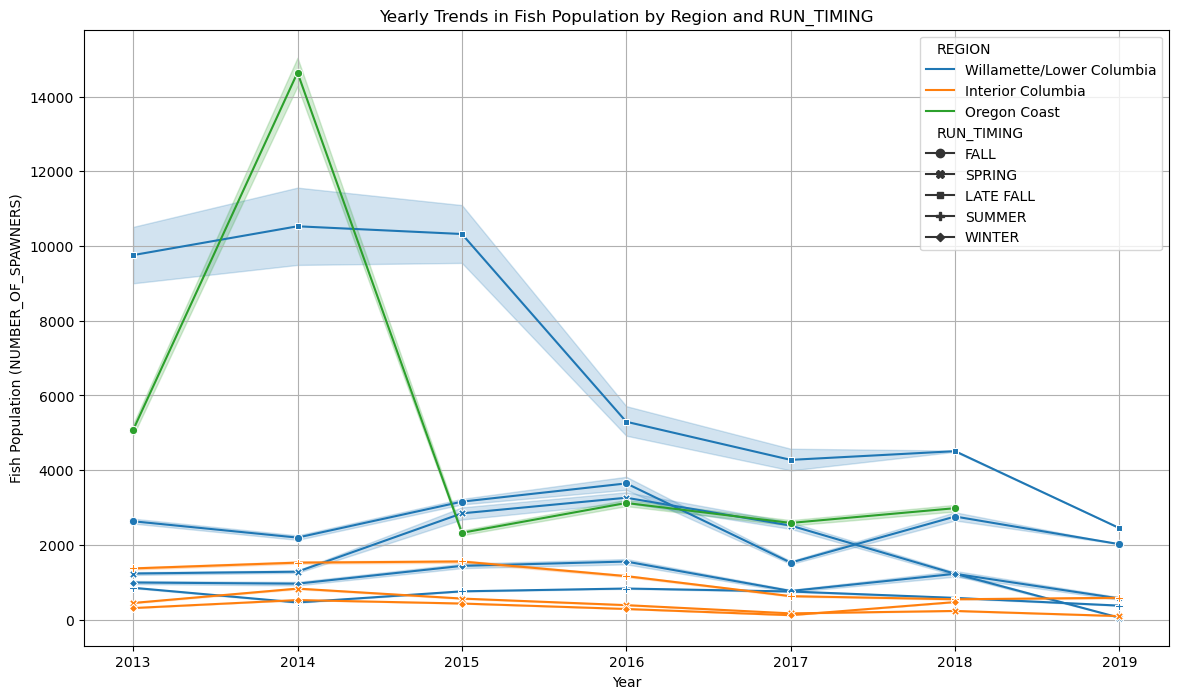

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

sns.lineplot(data=merged_data, x='YEAR', y='NUMBER_OF_SPAWNERS', hue='REGION', style='RUN_TIMING', markers=True, dashes=False)

plt.title('Yearly Trends in Fish Population by Region and RUN_TIMING')
plt.xlabel('Year')
plt.ylabel('Fish Population (NUMBER_OF_SPAWNERS)')
plt.grid(True)
plt.show()


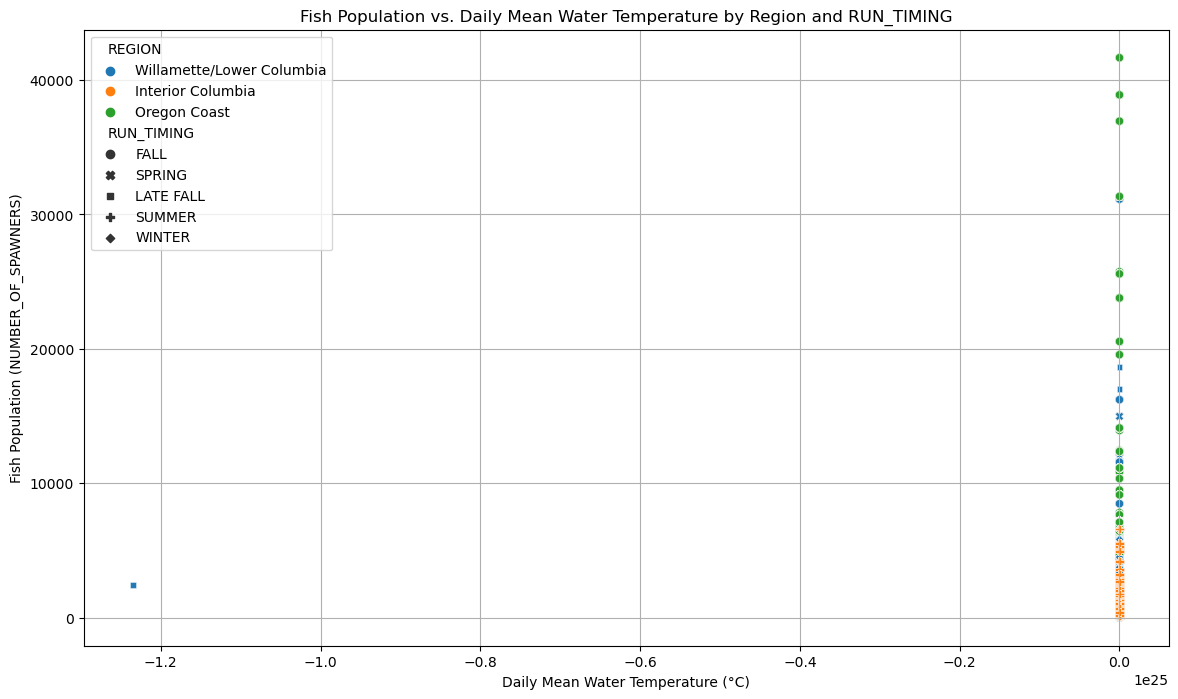

In [71]:
plt.figure(figsize=(14, 8))

sns.scatterplot(data=merged_data, x='DAILY_MEAN_WATER_TEMP', y='NUMBER_OF_SPAWNERS', hue='REGION', style='RUN_TIMING', alpha=0.7)

plt.title('Fish Population vs. Daily Mean Water Temperature by Region and RUN_TIMING')
plt.xlabel('Daily Mean Water Temperature (°C)')
plt.ylabel('Fish Population (NUMBER_OF_SPAWNERS)')
plt.grid(True)
plt.show()



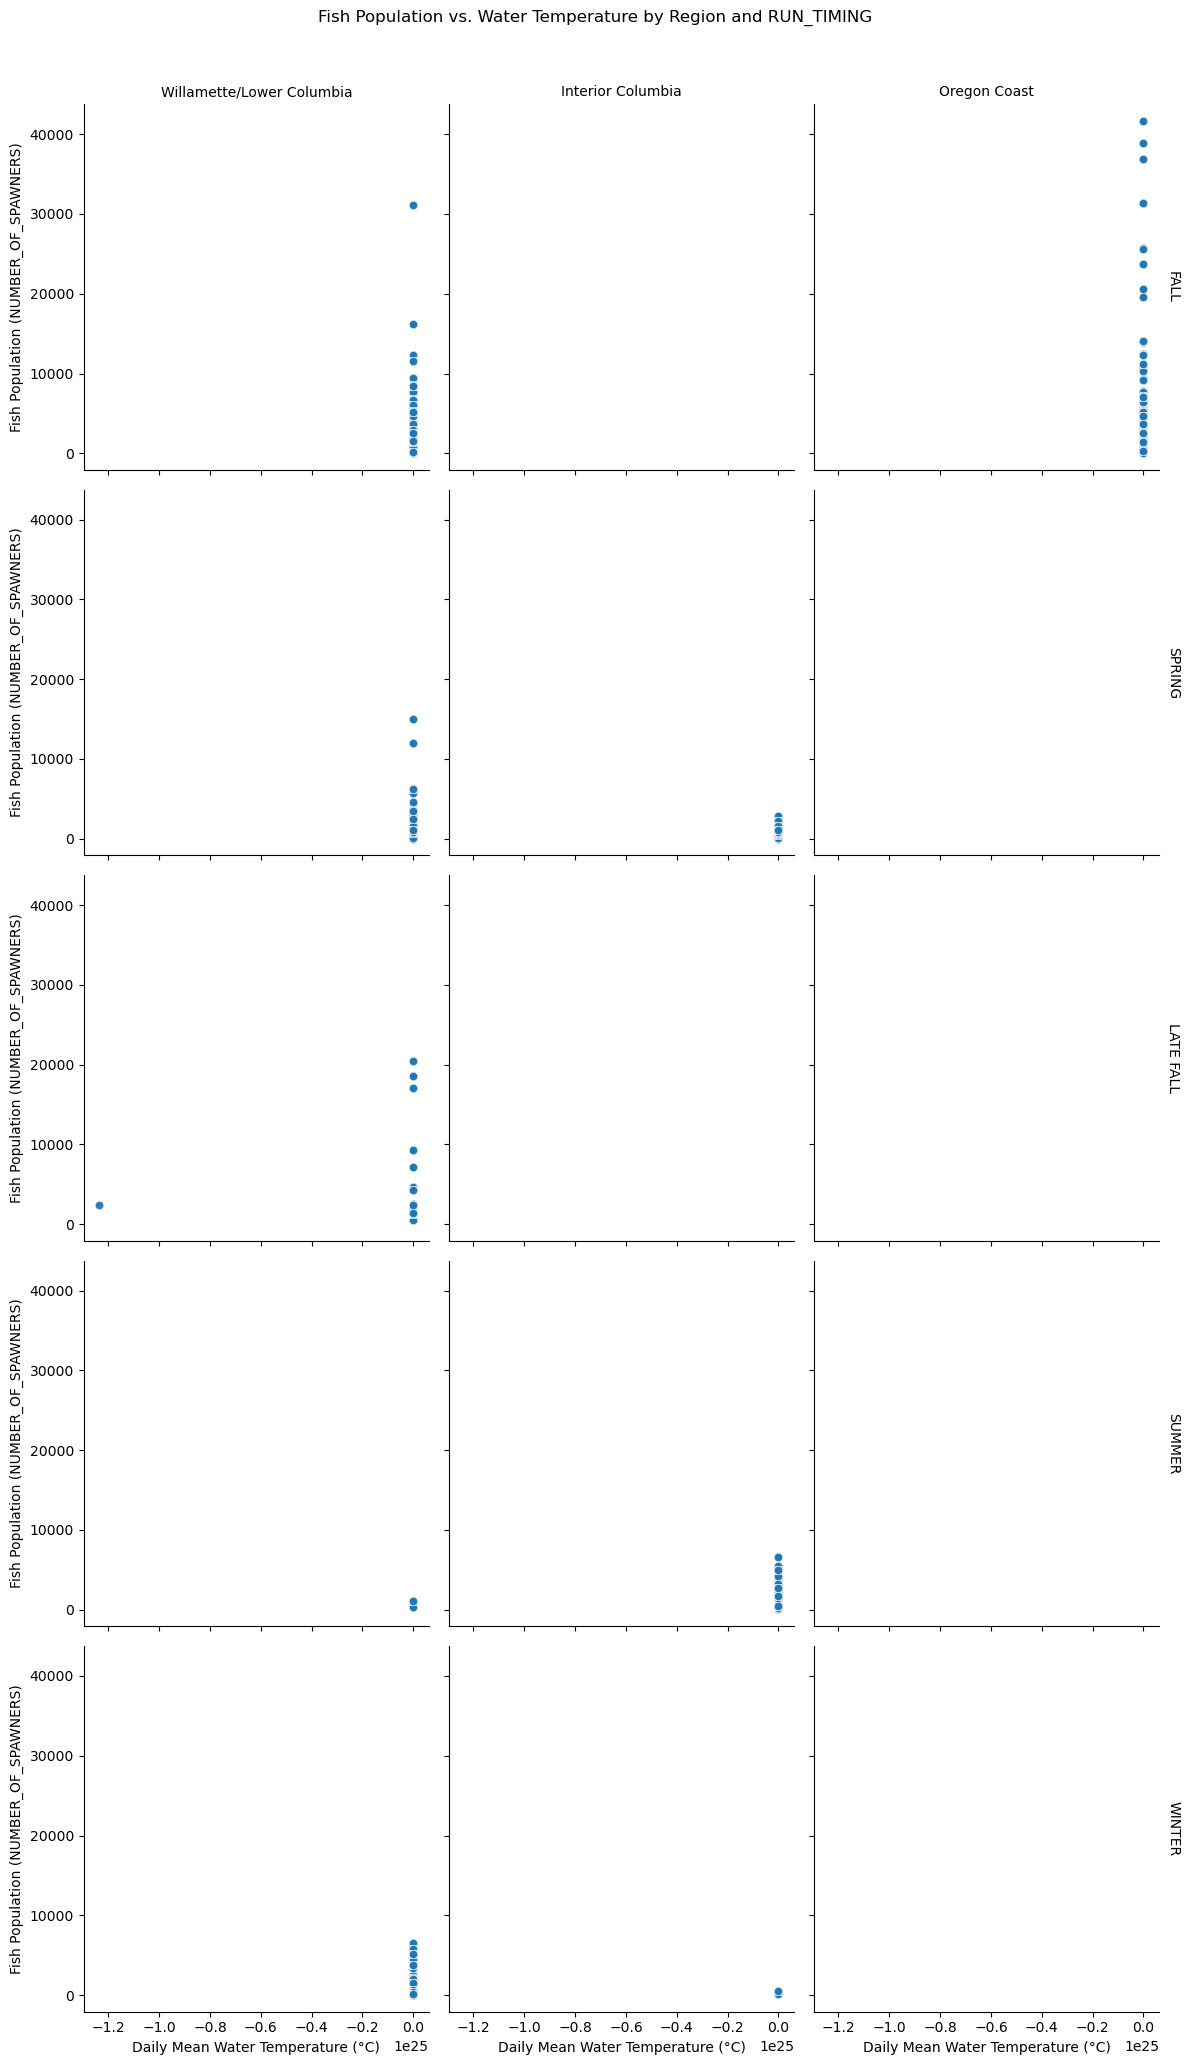

In [72]:
g = sns.FacetGrid(merged_data, col="REGION", row="RUN_TIMING", margin_titles=True, height=4)
g.map(sns.scatterplot, "DAILY_MEAN_WATER_TEMP", "NUMBER_OF_SPAWNERS", alpha=0.6)
g.set_axis_labels("Daily Mean Water Temperature (°C)", "Fish Population (NUMBER_OF_SPAWNERS)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.suptitle('Fish Population vs. Water Temperature by Region and RUN_TIMING', y=1.03)
plt.show()



 Line Plot: Fish Population vs. Daily Mean Water Temperature by Year

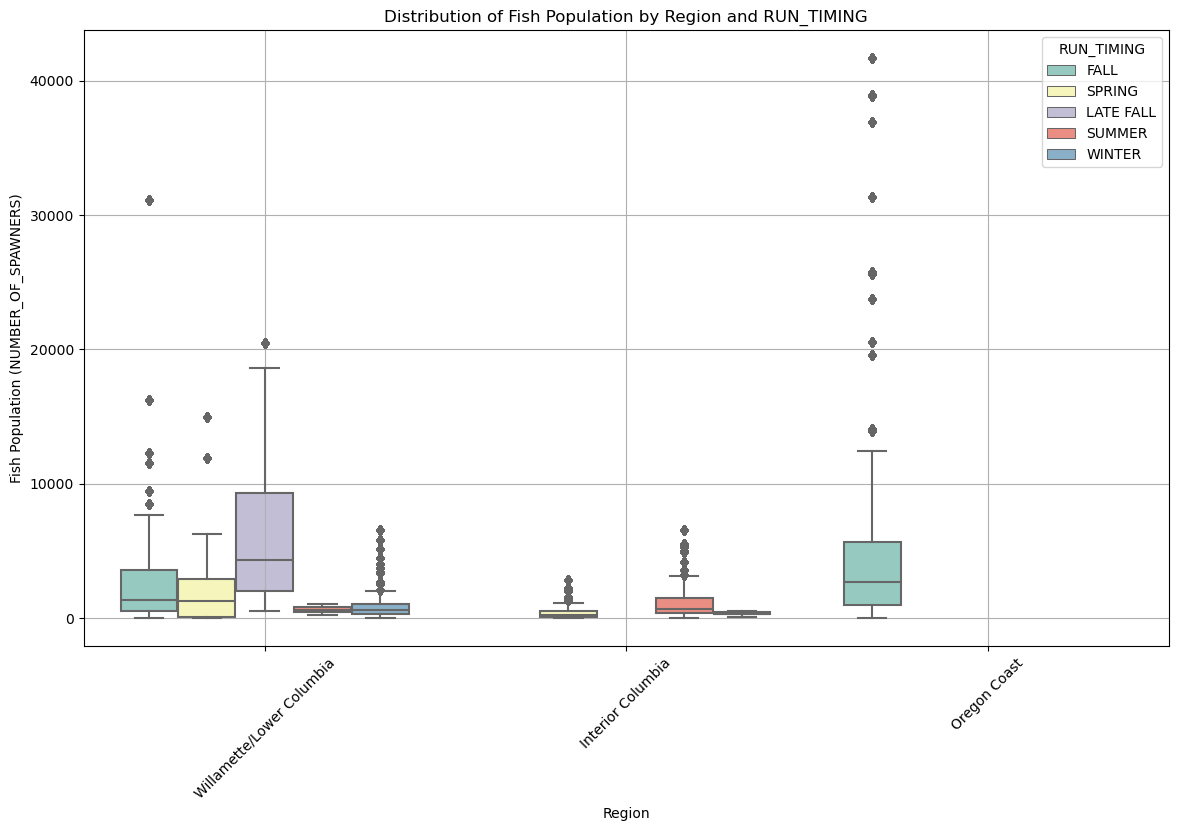

In [73]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='REGION', y='NUMBER_OF_SPAWNERS', hue='RUN_TIMING', data=merged_data, palette='Set3')

plt.title('Distribution of Fish Population by Region and RUN_TIMING')
plt.xlabel('Region')
plt.ylabel('Fish Population (NUMBER_OF_SPAWNERS)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


FacetGrid: Fish Population vs. Daily Mean Water Temperature by Region

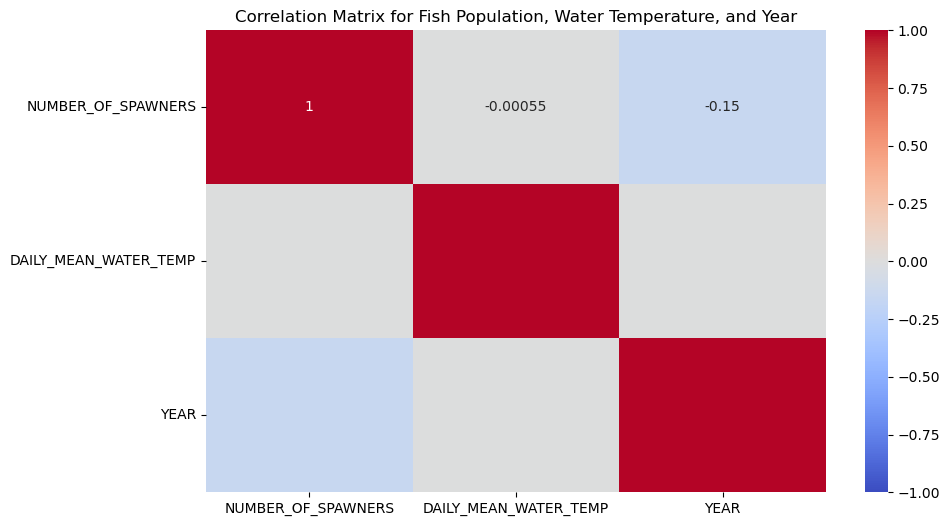

In [74]:
plt.figure(figsize=(10, 6))

corr_matrix = merged_data[['NUMBER_OF_SPAWNERS', 'DAILY_MEAN_WATER_TEMP', 'YEAR']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix for Fish Population, Water Temperature, and Year')
plt.show()


Scatter Plot: Fish Population vs. Daily Mean Water Temperature by RUN_TIMING

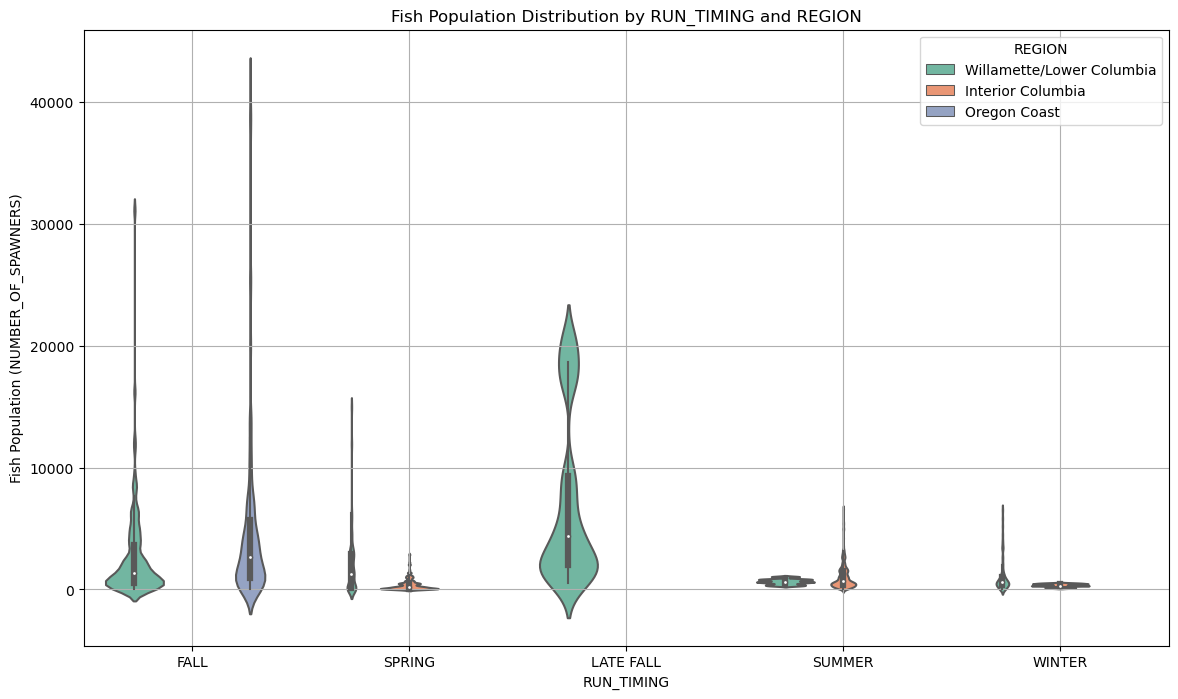

In [76]:
plt.figure(figsize=(14, 8))

sns.violinplot(x='RUN_TIMING', y='NUMBER_OF_SPAWNERS', hue='REGION', data=merged_data, palette='Set2')

plt.title('Fish Population Distribution by RUN_TIMING and REGION')
plt.xlabel('RUN_TIMING')
plt.ylabel('Fish Population (NUMBER_OF_SPAWNERS)')
plt.grid(True)
plt.show()


Box Plot: Fish Population by Region and RUN_TIMING

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1075:

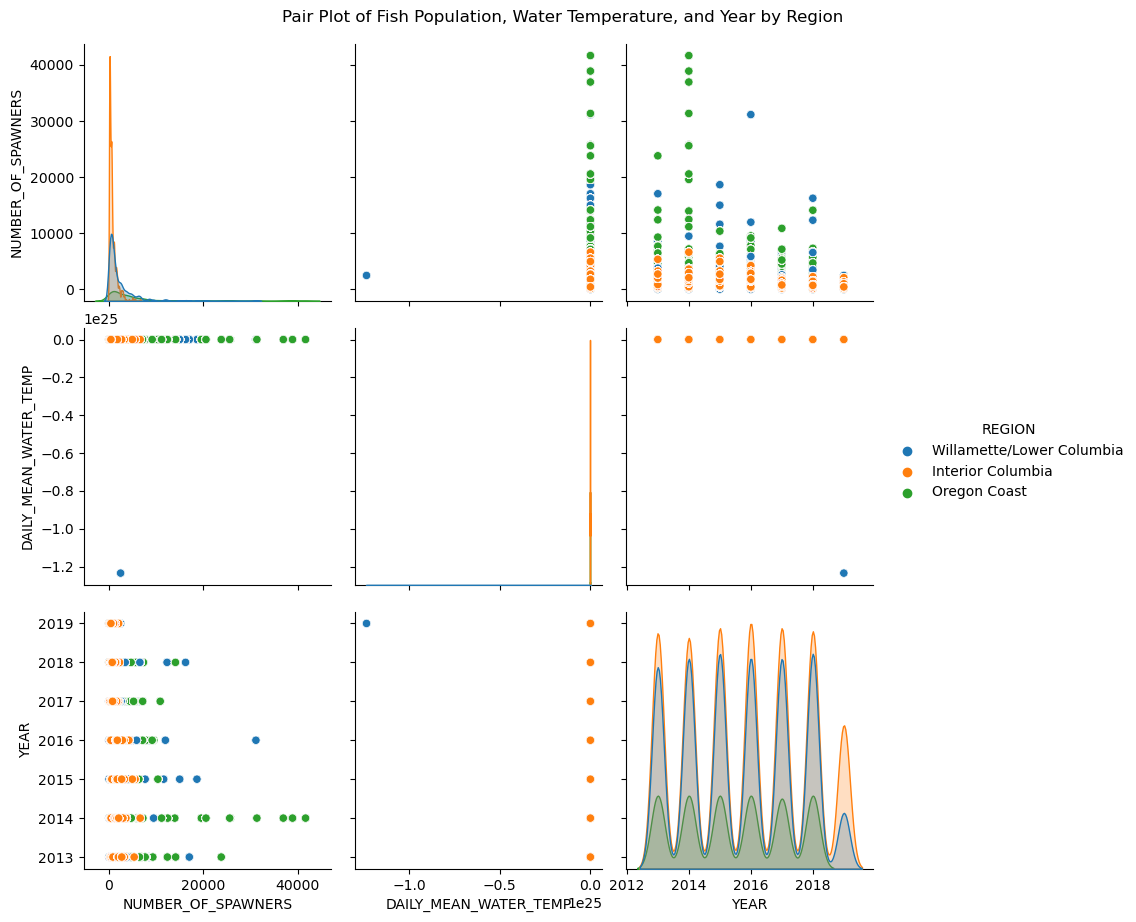

In [77]:
sns.pairplot(merged_data, vars=['NUMBER_OF_SPAWNERS', 'DAILY_MEAN_WATER_TEMP', 'YEAR'], hue='REGION', height=3)
plt.suptitle('Pair Plot of Fish Population, Water Temperature, and Year by Region', y=1.02)
plt.show()